In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading Dataset and checking for null values (Data Cleaning)

In [ ]:
heart=pd.read_csv('heart.csv')
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


#Feature Engineering

In [ ]:
heart['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [ ]:
heart['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [ ]:
a=heart['Age'].unique()
a.sort()
a

array([28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
       45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61,
       62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77])

In [ ]:
heart['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [ ]:
heart['Age_group']=pd.cut(heart['Age'],bins=[0,50,65,100],labels=['adult','middle aged','senior'])
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_group
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,adult
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,adult
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,adult
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,adult
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,middle aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,adult
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,senior
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,middle aged
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,middle aged


In [ ]:
new_order=heart.columns[[0,12,1,2,6,10,8,3,4,5,7,9,11]]
heart=heart[new_order]
heart

,Age,Age_group,Sex,ChestPainType,RestingECG,ST_Slope,ExerciseAngina,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,adult,M,ATA,Normal,Up,N,140,289,0,172,0.0,0
1,49,adult,F,NAP,Normal,Flat,N,160,180,0,156,1.0,1
2,37,adult,M,ATA,ST,Up,N,130,283,0,98,0.0,0
3,48,adult,F,ASY,Normal,Flat,Y,138,214,0,108,1.5,1
4,54,middle aged,M,NAP,Normal,Up,N,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,adult,M,TA,Normal,Flat,N,110,264,0,132,1.2,1
914,68,senior,M,ASY,Normal,Flat,N,144,193,1,141,3.4,1
915,57,middle aged,M,ASY,Normal,Flat,Y,130,131,0,115,1.2,1
916,57,middle aged,F,ATA,LVH,Flat,N,130,236,0,174,0.0,1


In [ ]:
heart['Sex']=heart['Sex'].map({'M':'Male','F':'Female'})
heart['ExerciseAngina']=heart['ExerciseAngina'].map({'N':'No','Y':'Yes'})

In [ ]:
heart1=pd.read_csv('heart.csv')
heart1['Sex']=heart1['Sex'].map({'M':1,'F':0})
heart1['ChestPainType']=heart1['ChestPainType'].map({'TA':0,'ATA':1,'NAP':2,'ASY':3})
heart1['RestingECG']=heart1['RestingECG'].map({'Normal':0,'ST':1,'LVH':2})
heart1['ExerciseAngina']=heart1['ExerciseAngina'].map({'N':0,'Y':1})
heart1['ST_Slope']=heart1['ST_Slope'].map({'Down':0,'Flat':1,'Up':2})
heart1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,0,172,0,0.0,2,0
1,49,0,2,160,180,0,0,156,0,1.0,1,1
2,37,1,1,130,283,0,1,98,0,0.0,2,0
3,48,0,3,138,214,0,0,108,1,1.5,1,1
4,54,1,2,150,195,0,0,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,0,110,264,0,0,132,0,1.2,1,1
914,68,1,3,144,193,1,0,141,0,3.4,1,1
915,57,1,3,130,131,0,0,115,1,1.2,1,1
916,57,0,1,130,236,0,2,174,0,0.0,1,1


In [ ]:
heart

,Age,Age_group,Sex,ChestPainType,RestingECG,ST_Slope,ExerciseAngina,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,adult,Male,ATA,Normal,Up,No,140,289,0,172,0.0,0
1,49,adult,Female,NAP,Normal,Flat,No,160,180,0,156,1.0,1
2,37,adult,Male,ATA,ST,Up,No,130,283,0,98,0.0,0
3,48,adult,Female,ASY,Normal,Flat,Yes,138,214,0,108,1.5,1
4,54,middle aged,Male,NAP,Normal,Up,No,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,adult,Male,TA,Normal,Flat,No,110,264,0,132,1.2,1
914,68,senior,Male,ASY,Normal,Flat,No,144,193,1,141,3.4,1
915,57,middle aged,Male,ASY,Normal,Flat,Yes,130,131,0,115,1.2,1
916,57,middle aged,Female,ATA,LVH,Flat,No,130,236,0,174,0.0,1


#1) Correlation Heatmap

<Axes: >

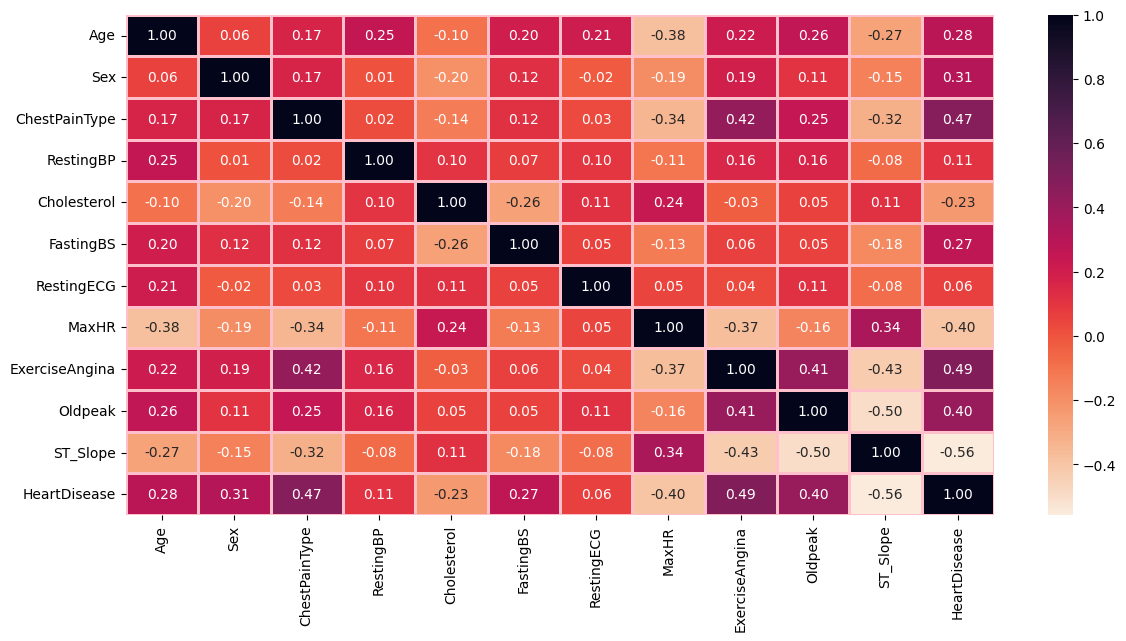

In [ ]:
a=heart1.corr(numeric_only=True)
plt.figure(figsize=(14,6.5))
sns.heatmap(data=a,annot=True,linewidth=2,linecolor='pink',cmap='rocket_r',fmt='.2f')

observation:
* The darker colors indicates strong positive correlation or when one value increases other also increases
* The lighter colors show negetive correlation or both values are inversely proportional
* Values :-
      a) 0.0-0.3 -- weak or ignorable relation
      b) 0.3-0.7 -- moderate relation
      c) 0.7-1.0 -- strong relation

#2) Number of patients with heart disease

In [ ]:
g1=heart.groupby('HeartDisease')
g1.get_group(1)
g1.count()

,Age,Age_group,Sex,ChestPainType,RestingECG,ST_Slope,ExerciseAngina,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
HeartDisease,,,,,,,,,,,,
0,410,410,410,410,410,410,410,410,410,410,410,410
1,508,508,508,508,508,508,508,508,508,508,508,508


Text(0.5, 1.0, 'Number of people with and without heart disease')

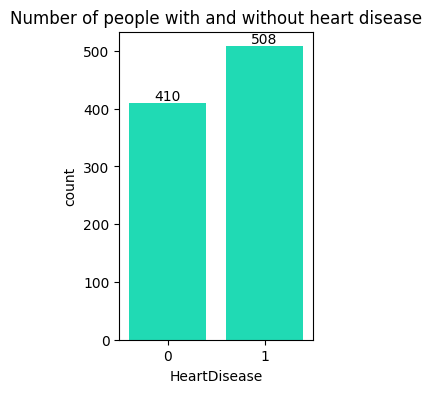

In [ ]:
plt.figure(figsize=(2.5,4))
obj=sns.countplot(data=heart,x='HeartDisease',color='#01F9C6')
for i in obj.containers:
  obj.bar_label(i)
plt.title("Number of people with and without heart disease")

observation:
* The number of chest pain patients with heart disease are more when compared to other patients
* heart Disease (0) - chest pain patients are not having heart disease
* heart Disease (1) - chest pain patients are having heart disease

#3) Relation of Age and Heart disease

In [ ]:
heart1['HeartDisease'].corr(heart1['Age'])

0.2820385058189969

Text(0.5, 1.0, 'Relation of age and heart disease')

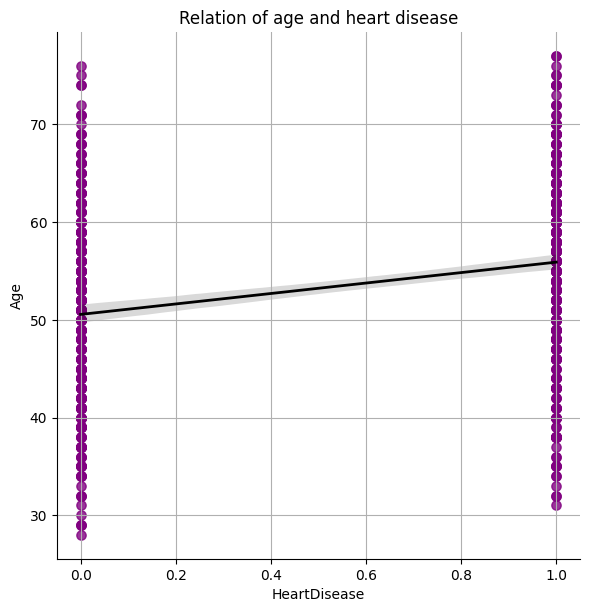

In [ ]:
sns.lmplot(data=heart,y='Age',x="HeartDisease",markers='o',height=6,scatter_kws={"s":45,'color':'purple'},line_kws={'color':'black','lw':2})
plt.grid()
plt.title("Relation of age and heart disease")

observation:
* The chance of having a heart disease and age are having a strong relation
* The number of people under age 30 are having less chance of getting heart disease and senior citizens are having a higher chance
* When the age increases, chances of having heart disease also increases

#4) Count of different age groups and gender with heart disease

In [ ]:
pd.pivot_table(data=heart,values='HeartDisease',index='Age_group',aggfunc='sum')

<ipython-input-21-af194ec6df83>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(data=heart,values='HeartDisease',index='Age_group',aggfunc='sum')


,HeartDisease
Age_group,
adult,125
middle aged,326
senior,57


In [ ]:
pd.pivot_table(data=heart,values='HeartDisease',index='Sex',aggfunc='sum')

,HeartDisease
Sex,
Female,50
Male,458


Text(0.5, 1.0, 'Count of patients in different gender')

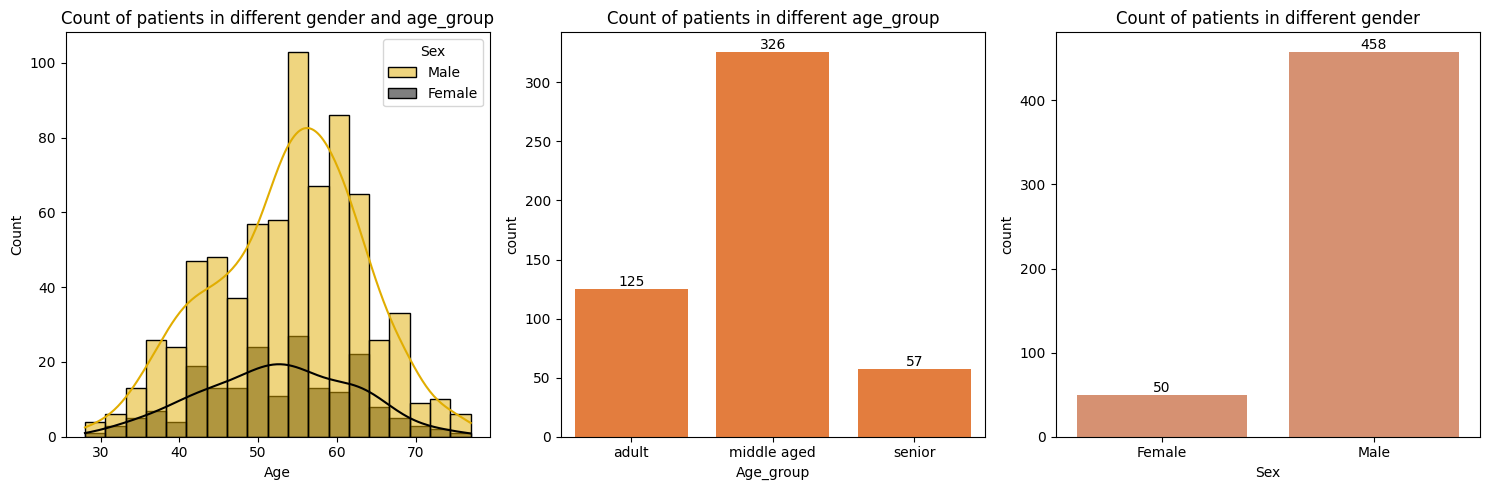

In [ ]:
g1=heart.groupby('HeartDisease')
data=g1.get_group(1)
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
obj=sns.histplot(data=heart,x='Age',hue='Sex',kde=True,palette=['#E1AD01','black'])
plt.title('Count of patients in different gender and age_group')

plt.tight_layout()

plt.subplot(1,3,2)
obj=sns.countplot(data=data,x='Age_group',color='#FF7722')
for i in obj.containers:
  obj.bar_label(i)
plt.title('Count of patients in different age_group')

plt.tight_layout()

plt.subplot(1,3,3)
obj=sns.countplot(data=data,x='Sex',color='#E78A61')
for i in obj.containers:
  obj.bar_label(i)
plt.title('Count of patients in different gender')

observation:
* More patients are in the age range 50-65 years
* More patients are males
* The number of senior and female patients are comparatively less

#5) Age group and gender of patients with heart disease

In [ ]:
pd.pivot_table(data=heart,values='HeartDisease',index=['Sex','Age_group'],aggfunc=['mean','sum'])

<ipython-input-24-1ba3baa8ce68>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(data=heart,values='HeartDisease',index=['Sex','Age_group'],aggfunc=['mean','sum'])
<ipython-input-24-1ba3baa8ce68>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(data=heart,values='HeartDisease',index=['Sex','Age_group'],aggfunc=['mean','sum'])


mean          sum
                   HeartDisease HeartDisease
Sex    Age_group                            
Female adult           0.141026           11
       middle aged     0.360000           36
       senior          0.200000            3
Male   adult           0.478992          114
       middle aged     0.690476          290
       senior          0.805970           54

Text(0.5, 1.0, 'Average of patients in different age_group and gender')

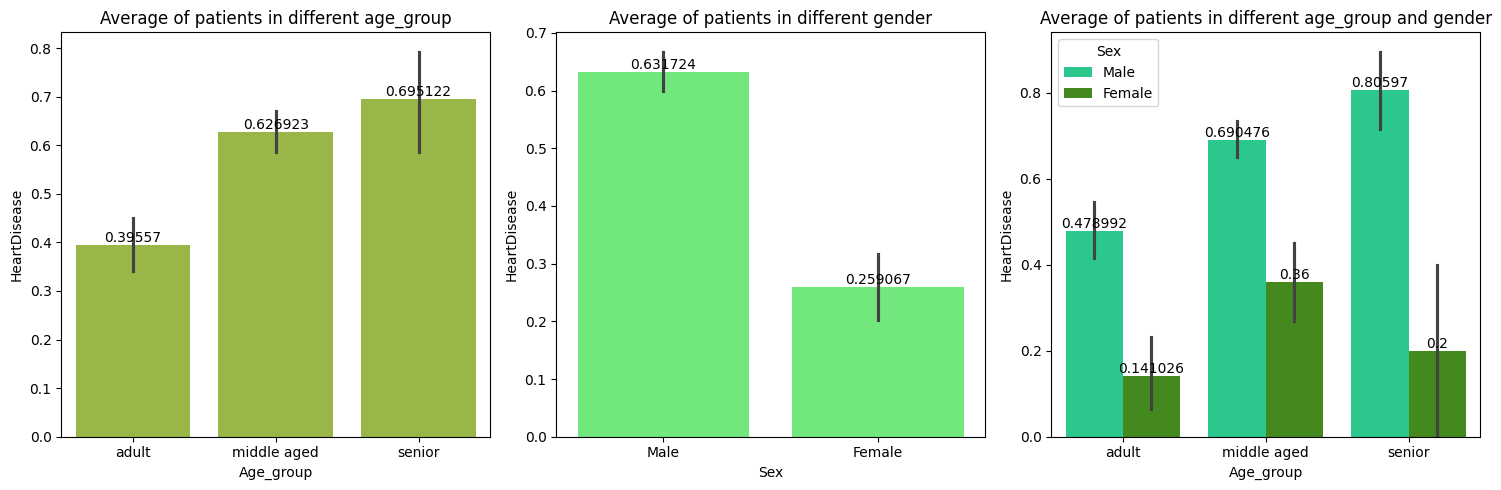

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
obj=sns.barplot(data=heart,x='Age_group',y='HeartDisease',color='#A1C935')
for i in obj.containers:
  obj.bar_label(i)
plt.title('Average of patients in different age_group')

plt.tight_layout()

plt.subplot(1,3,2)
obj=sns.barplot(data=heart,x='Sex',y='HeartDisease',color='#5EFB6E')
for i in obj.containers:
  obj.bar_label(i)
plt.title('Average of patients in different gender')

plt.tight_layout()

plt.subplot(1,3,3)
obj=sns.barplot(data=heart,x='Age_group',y='HeartDisease',hue='Sex',palette=['#12E193','#3F9B0B'])
for i in obj.containers:
  obj.bar_label(i)
plt.title('Average of patients in different age_group and gender')

observation:
* the number of middle aged and male patients are more
* seniors are having high chance of getting a heart disease
* males are having high chance of getting a heart disease
* Males in senior age group are having a higher chance of having a heart disease

#6) Different chestpain types

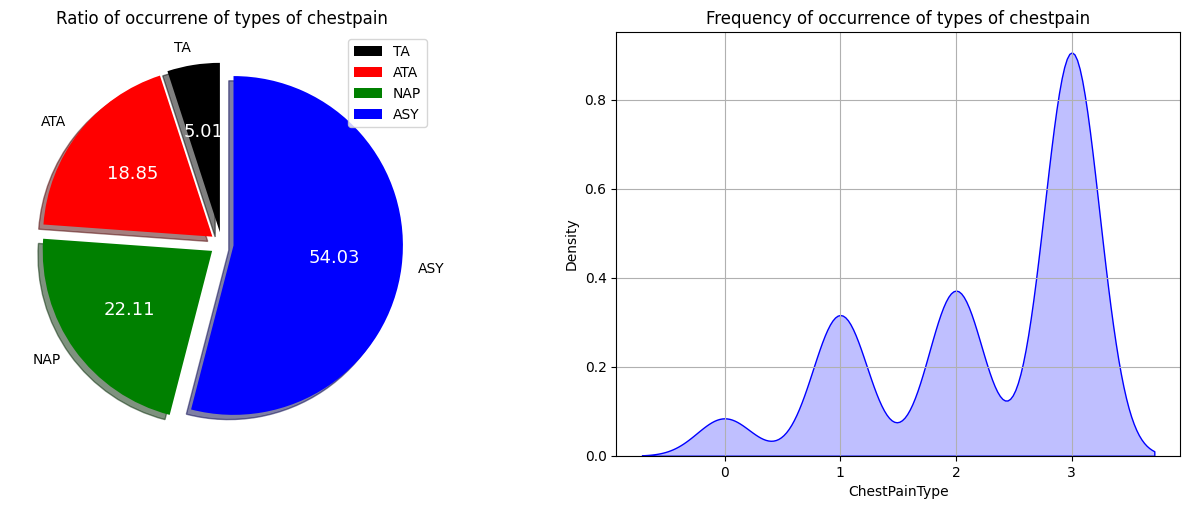

In [ ]:
plt.figure(figsize=(16,5.5))

plt.subplot(1,2,1)
d=[(heart1['ChestPainType']==0).sum(),(heart1['ChestPainType']==1).sum(),(heart1['ChestPainType']==2).sum(),(heart1['ChestPainType']==3).sum()]
widget,text,sliceText=plt.pie(d,explode=[0.07,0.07,0.07,0.07],labels=['TA','ATA','NAP','ASY'],shadow=True,colors=['black','red','green','blue'],startangle=90,autopct='%.2f')
for s in sliceText:
   s.set_color('white')
   s.set_fontsize(13)
plt.legend()
plt.title('Ratio of occurrene of types of chestpain')

plt.subplot(1,2,2)
sns.kdeplot(data=heart1,x='ChestPainType',color='blue',fill=True)
plt.title('Frequency of occurrence of types of chestpain')
plt.grid()

observation:
* More number of patients are having ASY or Asympomatic chestpain
* Types of chestpains :
        ▶ TA (Typical Angina) - chestpain caused when heart does not get enough blood and oxygen
        ▶ ATA (Atypical Angina) - chestpain due to respiratory mechanisms
        ▶ NAP (Non Anginal Pain) - chestpain not caused by heart
        ▶ ASY (Asympomatic pain) - chestpain without any symptoms, may be silent attack

#7) Chestpaintypes and heartdisease

In [ ]:
g1=heart.groupby('HeartDisease')
data=g1.get_group(1)
data[['ChestPainType','HeartDisease']]


,ChestPainType,HeartDisease
1,NAP,1
3,ASY,1
8,ASY,1
11,ATA,1
13,ASY,1
...,...,...
912,ASY,1
913,TA,1
914,ASY,1
915,ASY,1


Text(0.5, 1.0, 'Average of different chest pain types observed in patients')

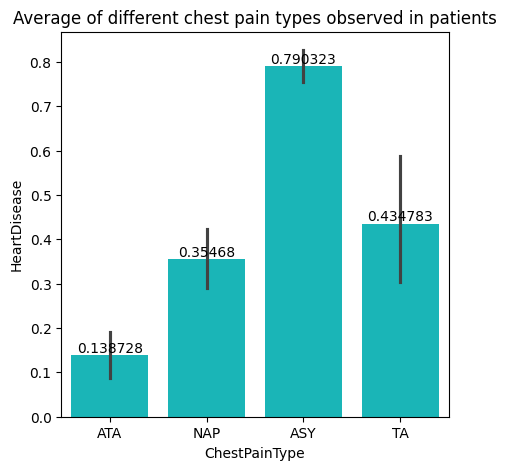

In [ ]:
plt.figure(figsize=(5,5))
obj=sns.barplot(data=heart,x='ChestPainType',y='HeartDisease',color='#00CED1')
for i in obj.containers:
  obj.bar_label(i)
plt.title("Average of different chest pain types observed in patients")

observation:
* Patients with asympomatic chestpains are most likely to have heart disease
* Patients with Atypical angina are least likely to have heart disease

#8)Different Resting ECG values

In [ ]:
heart['RestingECG'].unique()


array(['Normal', 'ST', 'LVH'], dtype=object)

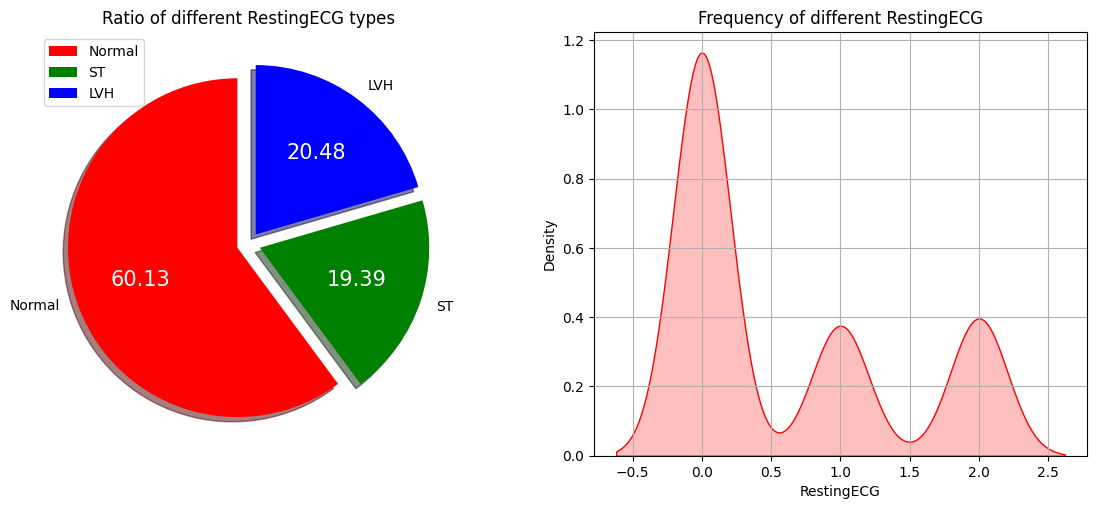

In [ ]:
plt.figure(figsize=(14,5.5))

plt.subplot(1,2,1)
d=[(heart1['RestingECG']==0).sum(),(heart1['RestingECG']==1).sum(),(heart1['RestingECG']==2).sum()]
widget,text,sliceText=plt.pie(d,explode=[0.07,0.07,0.07],labels=['Normal','ST','LVH',],shadow=True,colors=['red','green','blue'],startangle=90,autopct='%.2f')
for s in sliceText:
   s.set_color('white')
   s.set_fontsize(15)
plt.legend()
plt.title('Ratio of different RestingECG types')

plt.subplot(1,2,2)
sns.kdeplot(data=heart1,x='RestingECG',color='red',fill=True)
plt.title('Frequency of different RestingECG')
plt.grid()


observation:
* More people with chestpain are having Normal RestingECG
        ▶ Normal : ECG of patients are normal in condition
        ▶ ST : The region between T and S slope is showing a deviation (Down,Flat,Up)
        ▶ LVH : The condition when heart muscles thickens

#9) Resting ECG and heart disesse

In [ ]:
g1=heart.groupby('HeartDisease')
data=g1.get_group(1)
data[['RestingECG','HeartDisease']]


,RestingECG,HeartDisease
1,Normal,1
3,Normal,1
8,Normal,1
11,ST,1
13,Normal,1
...,...,...
912,Normal,1
913,Normal,1
914,Normal,1
915,Normal,1


Text(0.5, 1.0, 'Average of different RestingECG observed in patients')

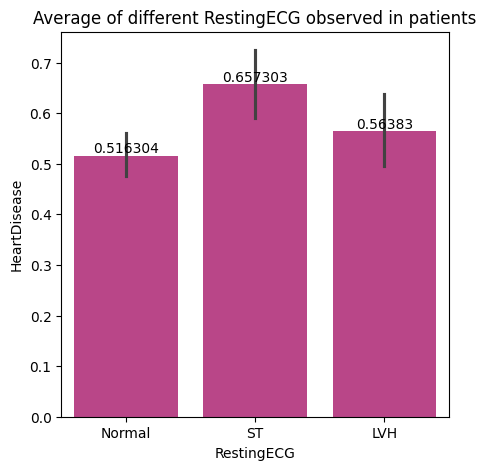

In [ ]:
plt.figure(figsize=(5,5))
obj=sns.barplot(data=heart,x='RestingECG',y='HeartDisease',color='#CC338B')
for i in obj.containers:
  obj.bar_label(i)
plt.title("Average of different RestingECG observed in patients")

observation:
* More number of patients were having Normal Resting ECG
* The patients with Resting ECG as ST are more prone to heart disease

#10) Different values in ST_Slope

In [ ]:
heart['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

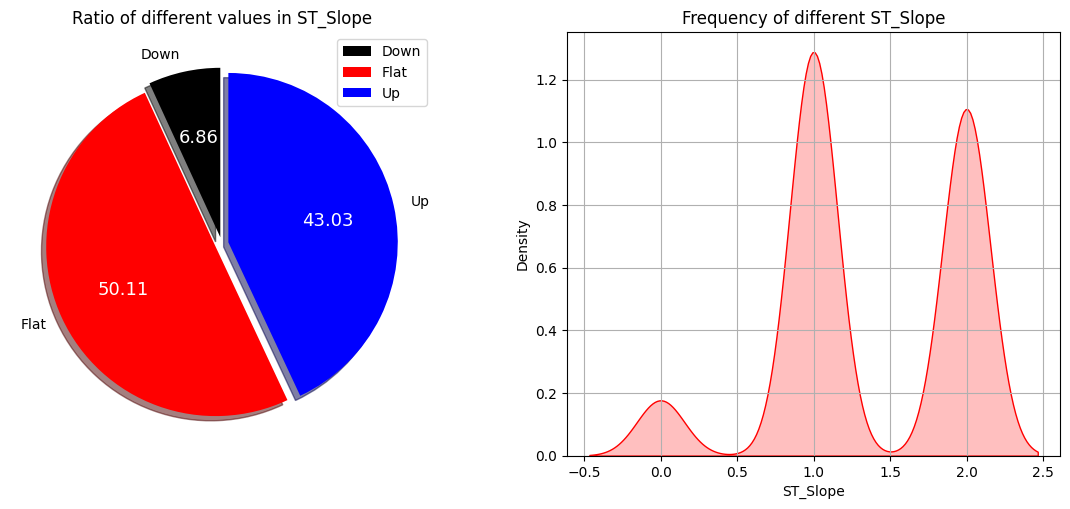

In [ ]:
plt.figure(figsize=(14,5.5))

plt.subplot(1,2,1)
d=[(heart1['ST_Slope']==0).sum(),(heart1['ST_Slope']==1).sum(),(heart1['ST_Slope']==2).sum()]
widget,text,sliceText=plt.pie(d,explode=[0.04,0.04,0.04],labels=['Down','Flat','Up',],shadow=True,colors=['black','red','blue'],startangle=90,autopct='%.2f')
for s in sliceText:
   s.set_color('white')
   s.set_fontsize(13)
plt.legend()
plt.title('Ratio of different values in ST_Slope')

plt.subplot(1,2,2)
sns.kdeplot(data=heart1,x='ST_Slope',color='red',fill=True)
plt.title('Frequency of different ST_Slope')
plt.grid()

observation:
* Patients having a flat ST_Slope are more in number
* The second are the patients with Up ST_Slope
* ST_Slope:
        ▶ Flat: ST_Slope if flat
        ▶ Down: The slope deviated downwards from baseline (Depression)
        ▶ Up: The slope deviated upwards from baseline (Elevation)

#11) ST_Slope Types and heart disease

In [ ]:
pd.pivot_table(data=heart,values='HeartDisease',index='ST_Slope',aggfunc='count')

,HeartDisease
ST_Slope,
Down,63
Flat,460
Up,395


Text(0.5, 1.0, 'Average of different ST_Slopes observed in patients')

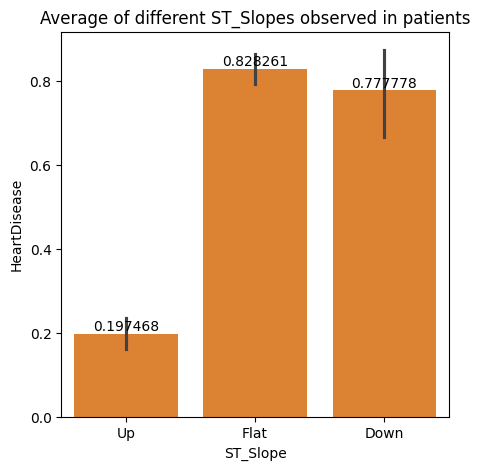

In [ ]:
plt.figure(figsize=(5,5))
obj=sns.barplot(data=heart,x='ST_Slope',y='HeartDisease',color='#F88017')
for i in obj.containers:
  obj.bar_label(i)
plt.title("Average of different ST_Slopes observed in patients")

observation:
* Chestpain patients with Flat ST_Slope are having high chances of getting heart disease followed by Dpwn ST_Slope

#12) Number of patients with exercise angina

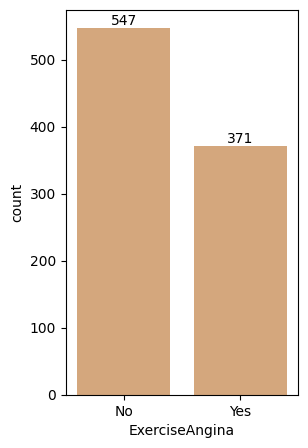

In [ ]:
plt.figure(figsize=(3,5))
obj=sns.countplot(data=heart,x='ExerciseAngina',color='#E2A76F')
for i in obj.containers:
  obj.bar_label(i)

observation:
* Exercise Angina is a condition or chestpain caused due to extreme exercise, stress or anxiety, extreme temperature conditions (heat or cold), alcohol consumption or smoking habits
* In total number of patients, more do not have Exercise Angina

#13)Exercise Angina and heartdisease

In [ ]:
pd.pivot_table(data=heart,values='HeartDisease',index='ExerciseAngina',aggfunc='count')

,HeartDisease
ExerciseAngina,
No,547
Yes,371


Text(0.5, 1.0, 'Chances of ExerciseAngina leading to heart disease')

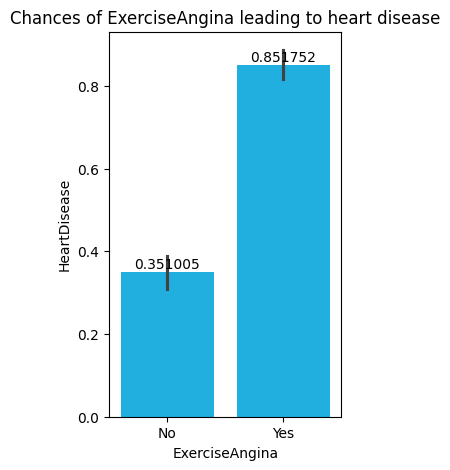

In [ ]:
plt.figure(figsize=(3,5))
obj=sns.barplot(data=heart,x='ExerciseAngina',y='HeartDisease',color='#00BFFF')
for i in obj.containers:
  obj.bar_label(i)
plt.title("Chances of ExerciseAngina leading to heart disease")

observation:
* The chance of getting a heart disease is higher for patients with Exercise Angina

#14) Resting BP and heartdisease

In [ ]:
pd.pivot_table(data=heart,index='HeartDisease',values='RestingBP',aggfunc=['mean','max','min'])

,mean,max,min
,RestingBP,RestingBP,RestingBP
HeartDisease,,,
0,130.180488,190,80
1,134.185039,200,0


<Axes: xlabel='RestingBP', ylabel='HeartDisease'>

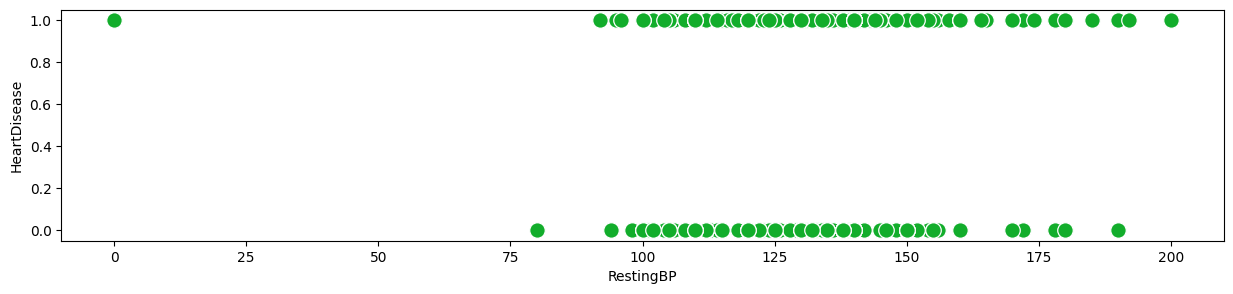

In [ ]:
plt.figure(figsize=(15,3))
sns.scatterplot(data=heart,x='RestingBP',y='HeartDisease',color='#12AD2B',s=125)


observation:
* The datapoints are clustered in 0 or 1 indicating patients with or without heart disease
* There are no pints in middle showing discrete data (i.e data is not continous or not in a range)
* Patients with high RestingBP have more chances of having heart disease
* More number of patients are having BP in range of 125-150 and maximum and minimum values are, for 0 --> 190/80 and for 1 --> 200/0 while the normal range is 120/80

#15) Cholesterol and heart disease

In [ ]:
pd.pivot_table(data=heart,index='HeartDisease',values='Cholesterol',aggfunc=['mean','max','min'])

,mean,max,min
,Cholesterol,Cholesterol,Cholesterol
HeartDisease,,,
0,227.121951,564,0
1,175.940945,603,0


<Figure size 2500x200 with 0 Axes>

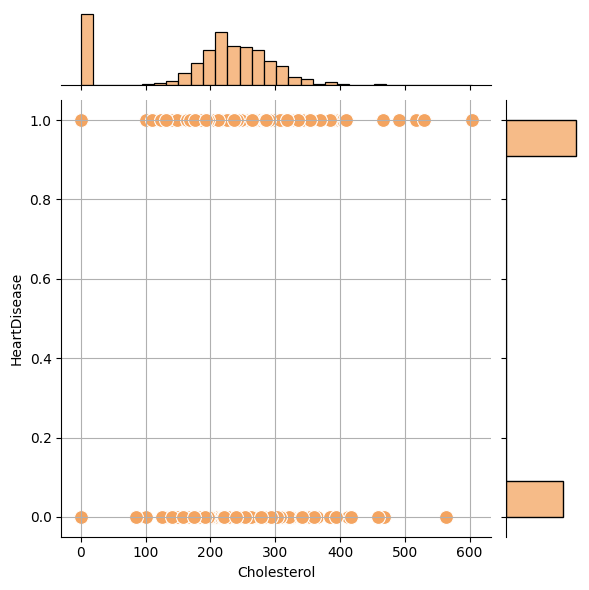

In [ ]:
plt.figure(figsize=(25,2))
sns.jointplot(data=heart,x='Cholesterol',y='HeartDisease',color='#F4A460',s=100)
plt.grid()

observation:
* The datapoints are clustered in 0 or 1 indicating patients with or without heart disease
* There are no pints in middle showing discrete data (i.e data is not continous or not in a range)
* Patients with high Cholesterol have more chances of having heart disease
* More number of patients are having Cholesterol in range of 250-400 and maximum values are, for 0 --> 564 and for 1 --> 603 while the normal range is 200

#16) Fasting BS and number of heart patients

In [ ]:
heart['FastingBS'].unique()

array([0, 1])

In [ ]:
g1=heart.groupby('HeartDisease')
data=g1.get_group(1)
data=data[['FastingBS','HeartDisease']]
data.sum()

,0
FastingBS,170
HeartDisease,508


Text(0.5, 1.0, 'Number of heart patients with BS > 120mg/dl')

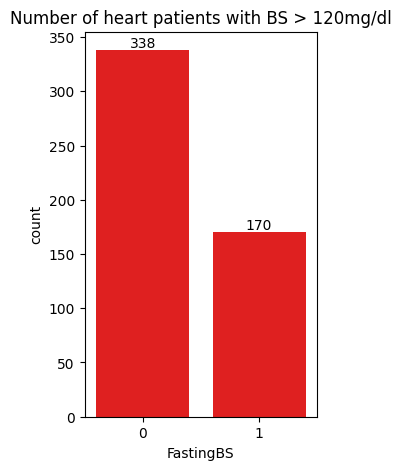

In [ ]:
plt.figure(figsize=(3,5))
obj=sns.countplot(data=data,x='FastingBS',color='red')
for i in obj.containers:
  obj.bar_label(i)
plt.title('Number of heart patients with BS > 120mg/dl')

observation:
* FastingBS - shows 0 if blood sugar is less than 120 mg/dl and shows 1 when BS> 120mg/dl
* More number of patients are having normal BS ranges

#17) Fasting BS and heart disease

In [ ]:
pd.pivot_table(data=heart,index='FastingBS',values='HeartDisease',aggfunc=['sum','mean'])

,sum,mean
,HeartDisease,HeartDisease
FastingBS,,
0,338,0.480114
1,170,0.794393


Text(0.5, 1.0, 'Average of heart patients with FastingBS > 120mg/dl')

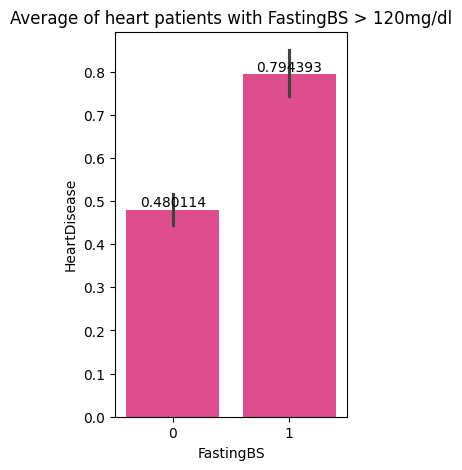

In [ ]:
plt.figure(figsize=(3,5))
obj=sns.barplot(data=heart,x='FastingBS',y='HeartDisease',color='#F6358A')
for i in obj.containers:
  obj.bar_label(i)
plt.title('Average of heart patients with FastingBS > 120mg/dl')

observation:
* Patients with FastingBS are having a higher chance of having heart disease
* The normal Blood sugar range is 120

#18) Maximum heart rate and heart disease

In [ ]:
pd.pivot_table(data=heart,index='HeartDisease',values='MaxHR',aggfunc=['mean','max','min'])

,mean,max,min
,MaxHR,MaxHR,MaxHR
HeartDisease,,,
0,148.151220,202,69
1,127.655512,195,60


Text(0.5, 1.0, 'HeartRate and HeartDisease')

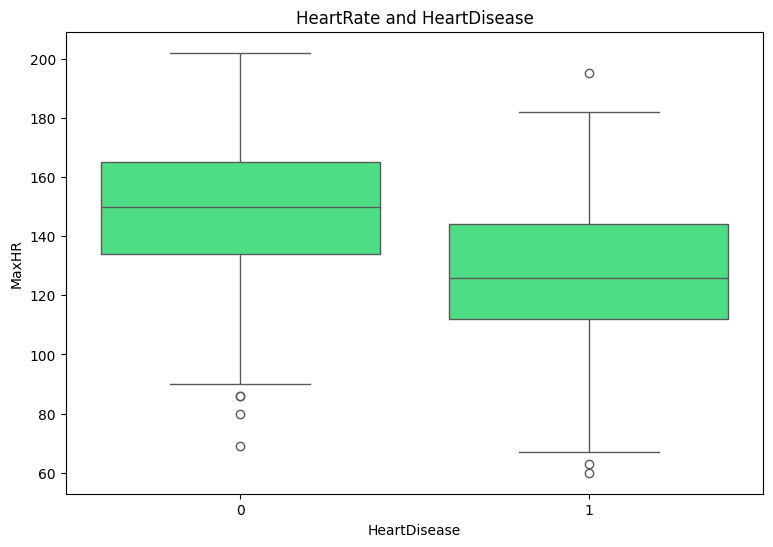

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot(data=heart,y='MaxHR',x='HeartDisease',color='#36F57F')
plt.title('HeartRate and HeartDisease')

observation:
* The maximum heart rate is marked for patients without heart disease (max-202, min-69)
* The minimum heart rate is marked for patients with heart disease (max-195, min-60)
* The mean heart rate is more for patients without heart disease
* The normal heart rate is 60-100 but may become 200 in case of exercise, stress etc.
* Patients with heart disease are having less heart rate

#19) Oldpeak and heartdisease

In [ ]:
h1=heart['Oldpeak'].unique()
h1.size

53

In [ ]:
pd.pivot_table(data=heart,index='HeartDisease',values='Oldpeak',aggfunc=['mean','max','min'])

,mean,max,min
,Oldpeak,Oldpeak,Oldpeak
HeartDisease,,,
0,0.408049,4.2,-1.1
1,1.274213,6.2,-2.6


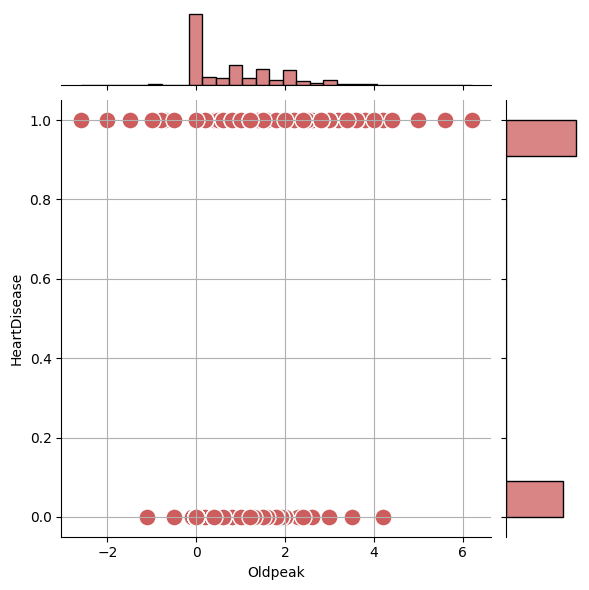

In [ ]:
sns.jointplot(data=heart,y='HeartDisease',x='Oldpeak',color='#CD5C5C',s=150)
plt.grid()

observation:
* oldpeak is amount of deviation of ST depression (ST_Slope down) from baseline
* The datapoints are clustered in 0 or 1 indicating patients with or without heart disease
* There are no pints in middle showing discrete data (i.e data is not continous or not in a range)
* Patients with high oldpeak have more chances of having heart disease
* More number of patients are having oldpeak in range of 0-2.5 and maximum and minimum values are, for 0 --> 4.2/(-1.1) and for 1 --> 6.2/(-2.6)

#20) Relation of different age_groups and gender with physical conditions

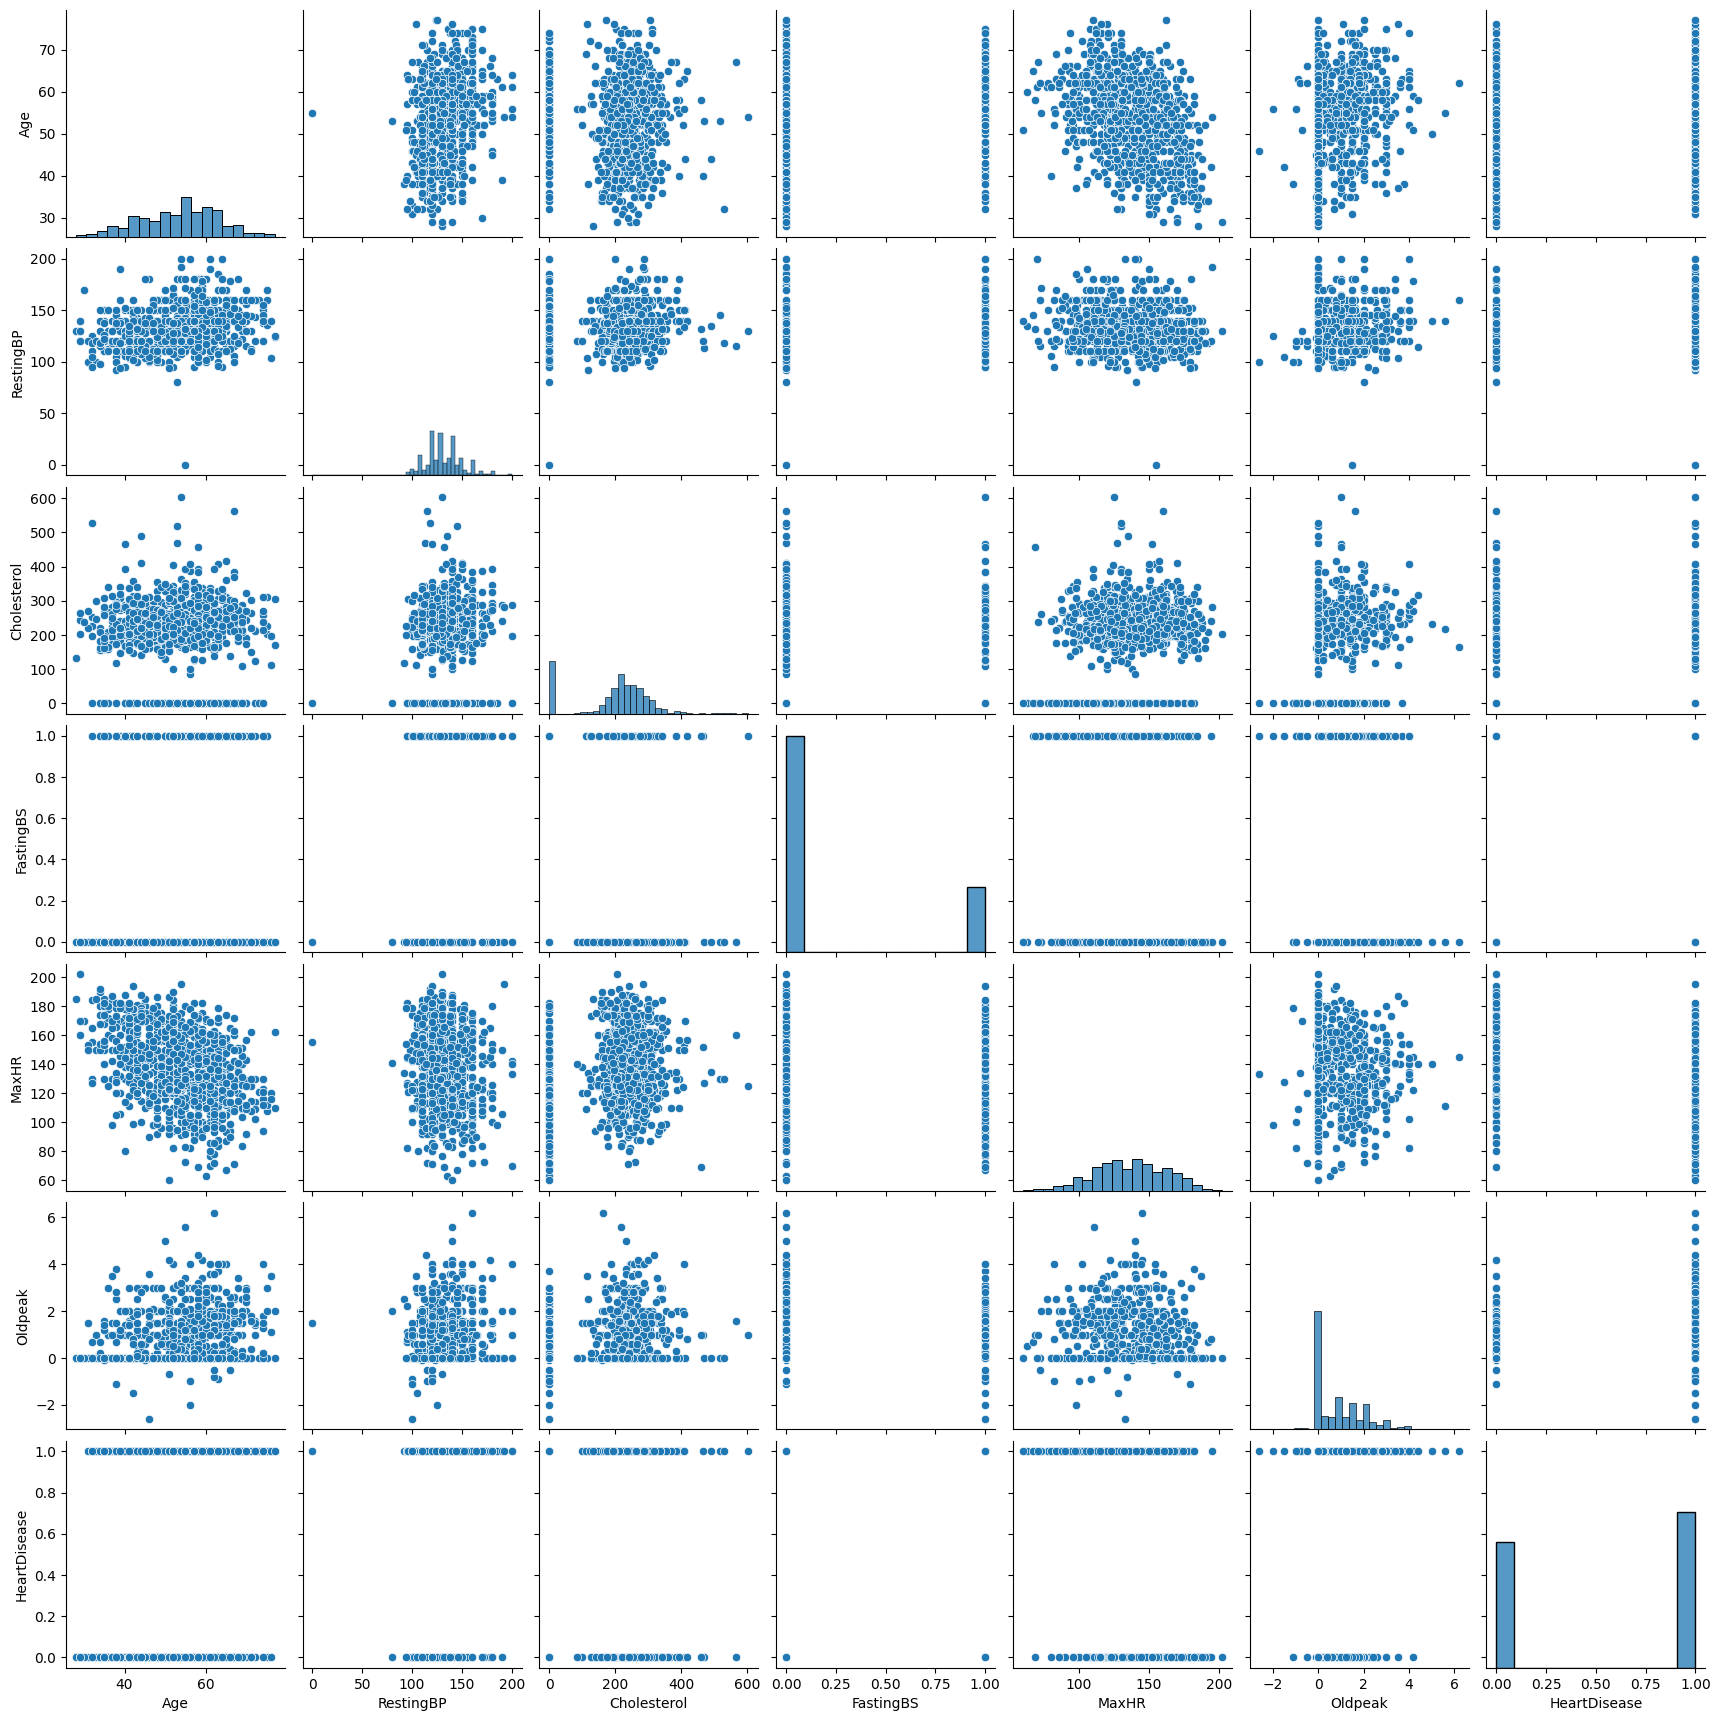

In [ ]:
sns.pairplot(data=heart)

###cholesterol

<Figure size 1500x500 with 0 Axes>

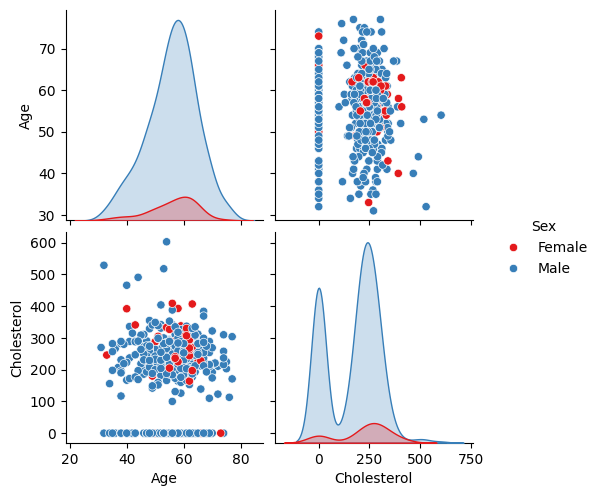

In [ ]:
g1=heart.groupby('HeartDisease')
data=g1.get_group(1)
heart2=data[['Age','Cholesterol','Sex']]
plt.figure(figsize=(15,5))
sns.pairplot(heart2,hue='Sex',palette='Set1')

observation:
* More people are having Cholesterol in range of 150-300
* Males in age group of 60 and above (senior citizens) are having more Cholesterol

##RestingBP

<Figure size 1500x500 with 0 Axes>

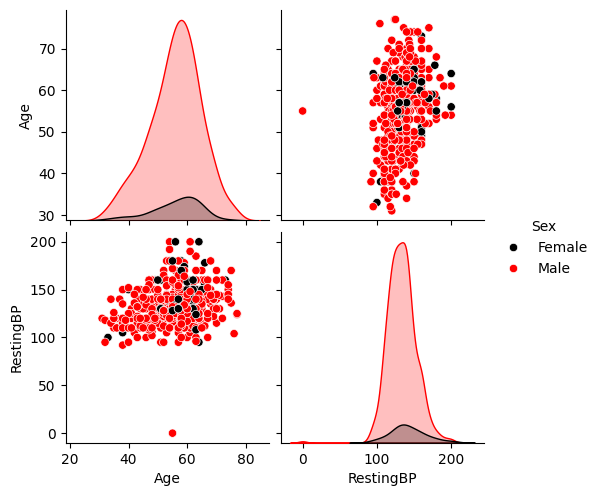

In [ ]:
g1=heart.groupby('HeartDisease')
data=g1.get_group(1)
heart2=data[['Age','RestingBP','Sex']]
plt.figure(figsize=(15,5))
sns.pairplot(heart2,hue='Sex',palette=['black','red'])

observation:
* More people are having RestingBP in range of 100-200
* Males in age group of 60 and above (senior citizens) are having more BP

##Maximum Heart Rate

<Figure size 1500x500 with 0 Axes>

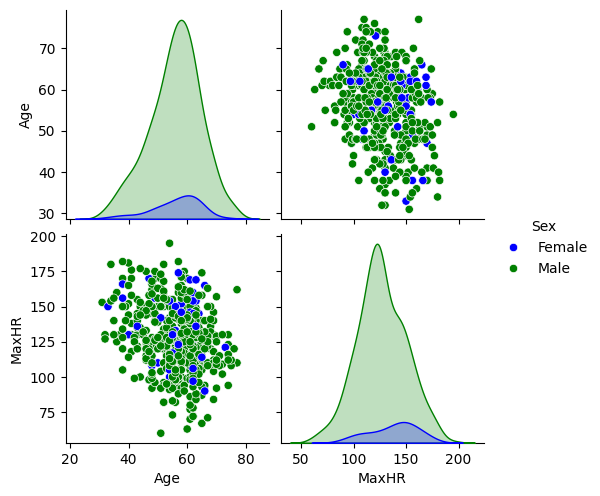

In [ ]:
g1=heart.groupby('HeartDisease')
data=g1.get_group(1)
heart2=data[['Age','MaxHR','Sex']]
plt.figure(figsize=(15,5))
sns.pairplot(heart2,hue='Sex',palette=['blue','green'])

observation:
* More people are having HR in range of 120-150
* Males in age group of 60 and above (senior citizens) are having less HR

##Oldpeak

<Figure size 1500x500 with 0 Axes>

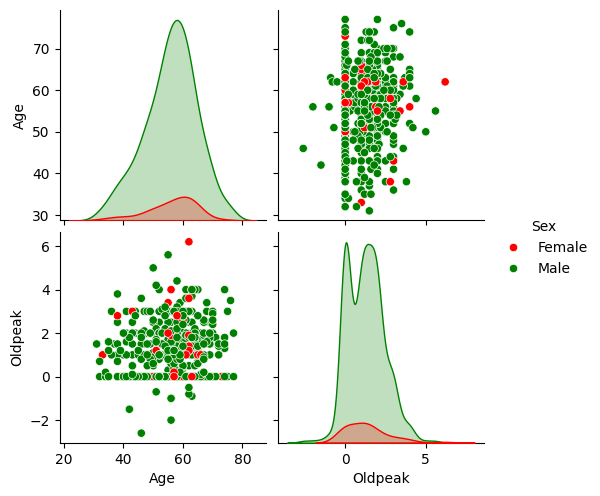

In [ ]:
g1=heart.groupby('HeartDisease')
data=g1.get_group(1)
heart2=data[['Age','Oldpeak','Sex']]
plt.figure(figsize=(15,5))
sns.pairplot(heart2,hue='Sex',palette=['red','green'])

observation:
* More people are having oldpeak in range of 1-2
* Males in age group of 60 and above (senior citizens) are having more oldpeak

#CONCLUSION

CAUSES OF HEART DISEASE

There are several reasons for hear disease such as:
* physical conditions            
* genetic issues
* stress or anxiety               
* excessive smoking and alcohol consumptions etc.

OBSERVATIONS FROM ANALYSIS
* Males in age group of 60+ years are having more chance of having heart disease
* Patients with ASY Chestpaintype, ST RestingECG, Flat/Down ST_Slope and with Excercise Angina are having high chances of having a heart disease
* Patients with high FastingBS, high RestingBP, high Cholesterol, high oldpeak and lower Heartrate are having more chances of having heart disease

PREVENTION OF HEART DISEASE
* right amount of exercise to have a fit body
* balanced diet to reduce or maintain the physical condition levels
* haelthy weight for correct functioning of heart
* Stress control or reducing chances of Exercise Angina
* Avoiding consumption of alcohol and smoking
* Early diagnosis and regular checkups